In [1]:
#importing and reading of necessary files and packages for the code
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json('transaction-data-adhoc-analysis.json')

In [2]:
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [3]:
#manual price breakdown of the different iine items
price_list = {
    'Exotic Extras,Beef Chicharon' : 1299,
    'HealthyKid 3+,Gummy Vitamins' : 1500,
    'HealthyKid 3+,Yummy Vegetables' : 500,
    'HealthyKid 3+,Nutrional Milk' : 1990,
    'Exotic Extras,Kimchi and Seaweed' : 799,
    'Candy City,Gummy Worms' : 150,
    'Candy City,Orange Beans' : 199,
}

In [4]:
#separation of line items per row
df['transaction_items'] = df['transaction_items'].apply(lambda x: x.split(';'))
df = df.explode('transaction_items')

#manipulation of date format used to the python date format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

#creation of transaction id column for all rows
df['transaction_id'] = df.index

#creation of quantity column for all rows
def item_quantity(row):
    return row['transaction_items'][-2]

df['quantity'] = df.apply(lambda row: item_quantity(row), axis=1)

#removal of quantities stated with string per row to clean the data
def clean_items(row):
    return row['transaction_items'][:-5]

df['transaction_items'] = df.apply(lambda row: clean_items(row), axis=1)

#computed sale value of line item per row based on the price list
def new_value(row):
    return price_list[row['transaction_items']] * int(row['quantity'])

df['transaction_value'] = df.apply(lambda row: new_value(row), axis=1)

In [5]:
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_id,quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon",5196,2022-01-12,0,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon",3897,2022-01-12,1,3
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Nutrional Milk",7960,2022-01-12,1,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Candy City,Orange Beans",199,2022-01-12,1,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins",4500,2022-01-08,2,3
...,...,...,...,...,...,...,...,...,...,...,...
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk",3980,2022-06-09,83034,2
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Gummy Worms",300,2022-06-09,83034,2
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"HealthyKid 3+,Nutrional Milk",1990,2022-06-03,83035,1
83035,"PSC 1089, Box 3720\nAPO AE 08973",2012/04/30,xjones@hotmail.com,Stephanie Russell,F,cmcdowell,"Candy City,Gummy Worms",450,2022-06-03,83035,3


Monthly Breakdown for January: 2022-01-01 - 2022-01-31

Total Count Sold: 68019
Total Sale Value: 62499914

                                  count_sold  item_price  sale_value
line_items                                                          
Candy City,Gummy Worms                  9555         150     1433250
Candy City,Orange Beans                 9773         199     1944827
Exotic Extras,Beef Chicharon            9661        1299    12549639
Exotic Extras,Kimchi and Seaweed        9672         799     7727928
HealthyKid 3+,Gummy Vitamins            9678        1500    14517000
HealthyKid 3+,Nutrional Milk            9723        1990    19348770
HealthyKid 3+,Yummy Vegetables          9957         500     4978500


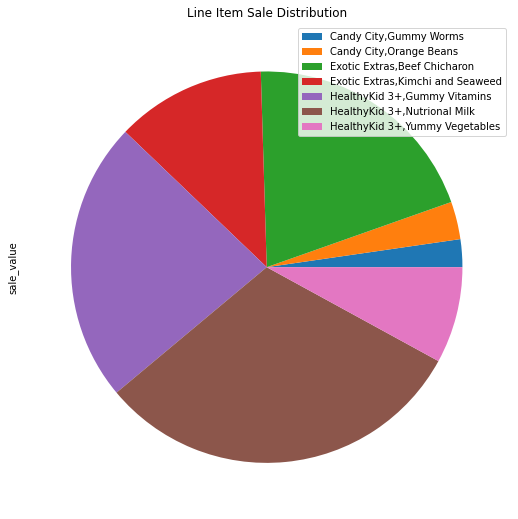

In [6]:
##monthly breakdown

#filtering the data by the inputted month and date range
def month_breakdown(month, start_date, end_date):
    
    breakdown_data = df.loc[(df['transaction_date'] >= pd.to_datetime(start_date)) & (df['transaction_date'] <= pd.to_datetime(end_date))]

#getting the total quantity per line item sold in that specific month and date range
    def sales_breakdown(dataframe):
        
        quantity_count = {}
        for index, row in dataframe.iterrows():
            line_items = row['transaction_items']
            if line_items not in quantity_count:
                quantity_count[line_items] = 0
            else: 
                quantity_count[line_items] += int(row['quantity'])

#breakdown of line items sold in terms of total count and total sale value
        item_sales = pd.DataFrame(quantity_count.items(), columns=['line_items', 'count_sold',])
        item_sales = item_sales.sort_values(by='line_items')

        def price_column(row):
            return price_list[row['line_items']]

        def value_column(row):
            return row['count_sold'] * price_list[row['line_items']]

        item_sales['item_price'] = item_sales.apply(lambda row: price_column(row), axis=1)
        item_sales['sale_value'] = item_sales.apply(lambda row: value_column(row), axis=1)
        
        item_sales = item_sales.reset_index(drop=True)
        item_sales = item_sales.set_index('line_items')
        
        print("Total Count Sold: {}".format(item_sales['count_sold'].sum()))
        print("Total Sale Value: {}".format(item_sales['sale_value'].sum()))
        print()
        
#formatting the pie graph for the sale distribution per "line item"
        # ax = item_sales.plot.barh(x='item', y='sale_value', figsize=(16,9))
        # ax
        item_sales.plot.pie(y='sale_value', figsize=(16,9), labels=None, fontsize=10, title='Line Item Sale Distribution')
        return item_sales

#printing of date range, count sold and sale value, detailed breakdown per "line item", and the pie graph interpretation
    print("Monthly Breakdown for {}: {} - {}".format(month, start_date, end_date))
    print()
    print(sales_breakdown(breakdown_data))
    return 
    
month_breakdown('January', '2022-01-01', '2022-01-31')

Monthly Breakdown for February: 2022-02-01 - 2022-02-28

Total Count Sold: 69894
Total Sale Value: 63805240

                                  count_sold  item_price  sale_value
line_items                                                          
Candy City,Gummy Worms                  9994         150     1499100
Candy City,Orange Beans                10035         199     1996965
Exotic Extras,Beef Chicharon           10000        1299    12990000
Exotic Extras,Kimchi and Seaweed        9945         799     7946055
HealthyKid 3+,Gummy Vitamins            9978        1500    14967000
HealthyKid 3+,Nutrional Milk            9688        1990    19279120
HealthyKid 3+,Yummy Vegetables         10254         500     5127000


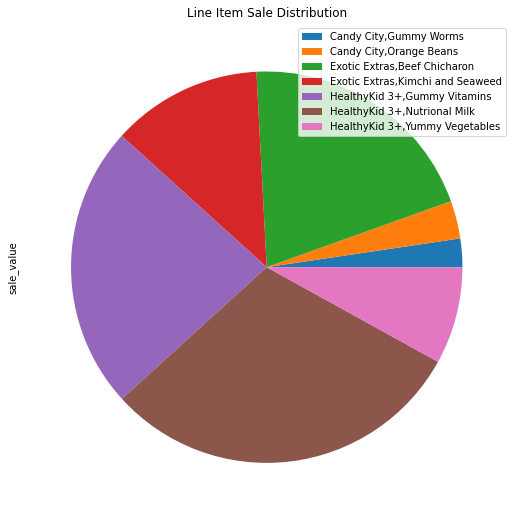

In [7]:
month_breakdown('February', '2022-02-01', '2022-02-28')

Monthly Breakdown for March: 2022-03-01 - 2022-03-31

Total Count Sold: 69282
Total Sale Value: 63928980

                                  count_sold  item_price  sale_value
line_items                                                          
Candy City,Gummy Worms                  9984         150     1497600
Candy City,Orange Beans                 9610         199     1912390
Exotic Extras,Beef Chicharon            9814        1299    12748386
Exotic Extras,Kimchi and Seaweed        9966         799     7962834
HealthyKid 3+,Gummy Vitamins           10143        1500    15214500
HealthyKid 3+,Nutrional Milk            9873        1990    19647270
HealthyKid 3+,Yummy Vegetables          9892         500     4946000


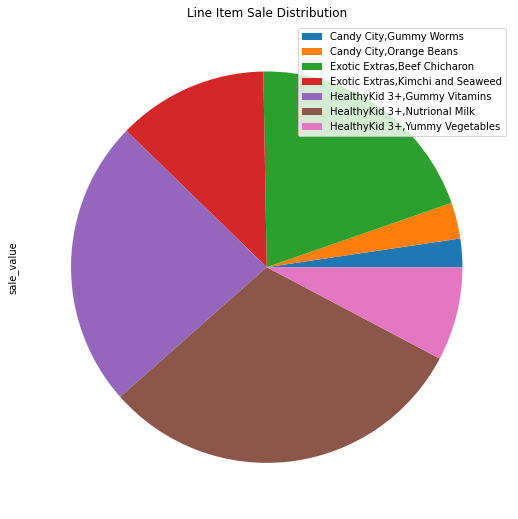

In [8]:
month_breakdown('March', '2022-03-01', '2022-03-31')

Monthly Breakdown for April: 2022-04-01 - 2022-04-30

Total Count Sold: 69236
Total Sale Value: 63403264

                                  count_sold  item_price  sale_value
line_items                                                          
Candy City,Gummy Worms                 10040         150     1506000
Candy City,Orange Beans                 9910         199     1972090
Exotic Extras,Beef Chicharon            9888        1299    12844512
Exotic Extras,Kimchi and Seaweed        9918         799     7924482
HealthyKid 3+,Gummy Vitamins            9841        1500    14761500
HealthyKid 3+,Nutrional Milk            9782        1990    19466180
HealthyKid 3+,Yummy Vegetables          9857         500     4928500


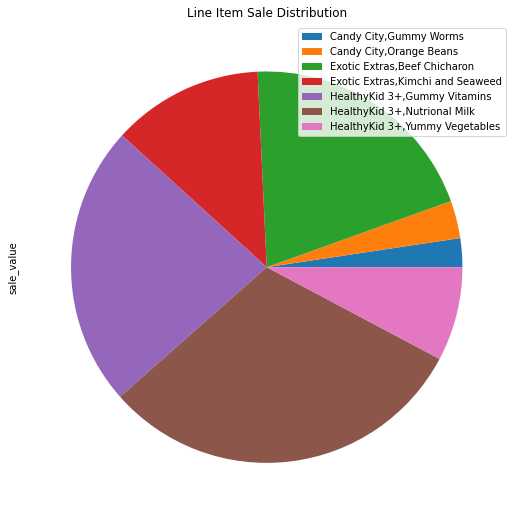

In [9]:
month_breakdown('April', '2022-04-01', '2022-04-30')

Monthly Breakdown for May: 2022-05-01 - 2022-05-31

Total Count Sold: 69108
Total Sale Value: 63722397

                                  count_sold  item_price  sale_value
line_items                                                          
Candy City,Gummy Worms                  9797         150     1469550
Candy City,Orange Beans                 9960         199     1982040
Exotic Extras,Beef Chicharon           10024        1299    13021176
Exotic Extras,Kimchi and Seaweed        9769         799     7805431
HealthyKid 3+,Gummy Vitamins            9944        1500    14916000
HealthyKid 3+,Nutrional Milk            9880        1990    19661200
HealthyKid 3+,Yummy Vegetables          9734         500     4867000


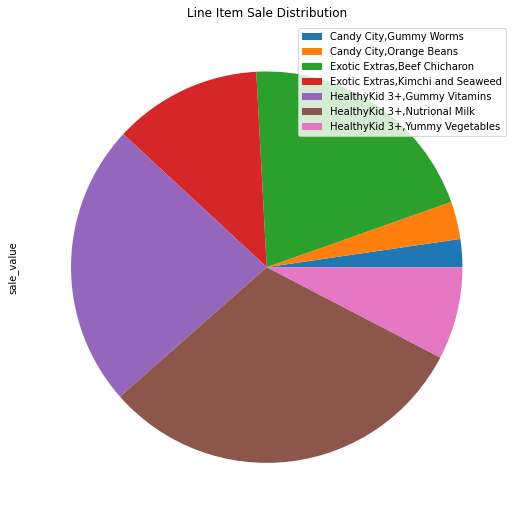

In [10]:
month_breakdown('May', '2022-05-01', '2022-05-31')

Monthly Breakdown for June: 2022-06-01 - 2022-06-30

Total Count Sold: 69500
Total Sale Value: 63690883

                                  count_sold  item_price  sale_value
line_items                                                          
Candy City,Gummy Worms                  9933         150     1489950
Candy City,Orange Beans                10104         199     2010696
Exotic Extras,Beef Chicharon            9901        1299    12861399
Exotic Extras,Kimchi and Seaweed       10102         799     8071498
HealthyKid 3+,Gummy Vitamins            9976        1500    14964000
HealthyKid 3+,Nutrional Milk            9766        1990    19434340
HealthyKid 3+,Yummy Vegetables          9718         500     4859000


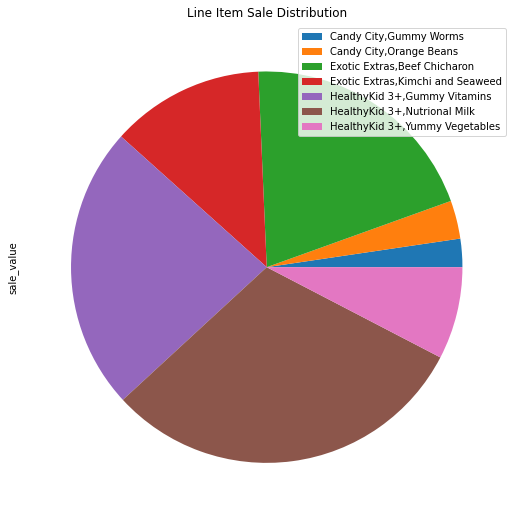

In [11]:
month_breakdown('June', '2022-06-01', '2022-06-30')

In [12]:
##repeaters

#filtering the data per month
def month_table(start_date, end_date):
    filtered_date = df.loc[(df['transaction_date'] >= pd.to_datetime(start_date)) & (df['transaction_date'] <= pd.to_datetime(end_date))]
    filtered_date = filtered_date.sort_values(by=['transaction_date', 'transaction_id'])
    return filtered_date

January_2022 = month_table('2022-01-01', '2022-01-31')
February_2022 = month_table('2022-02-01', '2022-02-28')
March_2022 = month_table('2022-03-01', '2022-03-31')
April_2022 = month_table('2022-04-01', '2022-04-30')
May_2022 = month_table('2022-05-01', '2022-05-31')
June_2022 = month_table('2022-06-01', '2022-06-30')

#month number to correspond to each month
months_2022 = [0, January_2022, February_2022, March_2022, April_2022, May_2022, June_2022]

#count of repeated users
def repeat_users_count(month_number):
    
    #for current month with applicable previous mounth data
    if month_number > 1:
        
        #names of previous and current users for the month
        previous_users = months_2022[month_number - 1]['name'].unique()
        current_users = months_2022[month_number]['name'].unique()
        
        #counter for number of users that are in both the current and previous months
        repeat_users_count = 0
        for name in current_users:
            if name in previous_users:
                repeat_users_count += 1
        return repeat_users_count
    
    #output of 0 for current month with no applicable previous month data
    else:
        repeat_count = 0
        return repeat_count

#printing of repeat users for each month
print("Repeaters: Customers who purchased during the current and previous month")
print()
print("January Repeat Users: {}".format(repeat_users_count(1)))
print("February Repeat Users: {}".format(repeat_users_count(2)))
print("March Repeat Users: {}".format(repeat_users_count(3)))
print("April Repeat Users: {}".format(repeat_users_count(4)))
print("May Repeat Users: {}".format(repeat_users_count(5)))
print("June Repeat Users: {}".format(repeat_users_count(6)))

Repeaters: Customers who purchased during the current and previous month

January Repeat Users: 0
February Repeat Users: 5172
March Repeat Users: 5216
April Repeat Users: 5154
May Repeat Users: 5110
June Repeat Users: 5193


In [13]:
#inactive
def inactive_users_count(month_number):
    
    #filtering the users for each month
    january_users = months_2022[1]['name'].unique()
    february_users = months_2022[2]['name'].unique()
    march_users = months_2022[3]['name'].unique()
    april_users = months_2022[4]['name'].unique()
    may_users = months_2022[5]['name'].unique()
    june_users = months_2022[6]['name'].unique()
    
    #appending of users to list depending on month input
    inactive_users_count = 0
    if month_number == 1:
        for name in january_users:
            inactive_users_count = 0
    if month_number == 2:
        for name in january_users:
            if name not in february_users:
                inactive_users_count += 1
    elif month_number == 3:
        for name in january_users:
            if name not in march_users and name in february_users:
                inactive_users_count += 1
    elif month_number == 4:
        for name in january_users:
            if name not in april_users and (name in february_users or name in march_users):
                inactive_users_count += 1
    elif month_number == 5:
        for name in january_users:
            if name not in may_users and (name in february_users or name in march_users or name in april_users):
                inactive_users_count += 1
    elif month_number == 6:
        for name in january_users:
            if name not in june_users and (name in february_users or name in march_users or name in april_users or name in may_users):
                inactive_users_count += 1
    return inactive_users_count

#printing of inactive users for each month    
print("Inactive Users: Customers with previous purchase history but none for the current month")
print()
print("January Inactive Users: {}".format(inactive_users_count(1)))
print("February Inactive Users: {}".format(inactive_users_count(2)))
print("March Inactive Users: {}".format(inactive_users_count(3)))
print("April Inactive Users: {}".format(inactive_users_count(4)))
print("May Inactive Users: {}".format(inactive_users_count(5)))
print("June Inactive Users: {}".format(inactive_users_count(6)))

Inactive Users: Customers with previous purchase history but none for the current month

January Inactive Users: 0
February Inactive Users: 1416
March Inactive Users: 1046
April Inactive Users: 1353
May Inactive Users: 1430
June Inactive Users: 1390


In [14]:
##engaged

#count of engaged users
def check_engaged_users(month_number):
    
    #list of engaged users
    engaged_users = []
    
    #filtering the users for each month
    january_users = months_2022[1]['name'].unique()
    february_users = months_2022[2]['name'].unique()
    march_users = months_2022[3]['name'].unique()
    april_users = months_2022[4]['name'].unique()
    may_users = months_2022[5]['name'].unique()
    june_users = months_2022[6]['name'].unique()
    
    #appending of users to list for each month
    if month_number == 1:
        for name in january_users:
                engaged_users.append(name)
    elif month_number == 2:
        for name in february_users:
            if name in january_users:
                engaged_users.append(name)
    elif month_number == 3:
        for name in march_users:
            if name in january_users and name in february_users:
                engaged_users.append(name)
    elif month_number == 4:
        for name in april_users:
            if name in january_users and name in february_users and name in march_users:
                engaged_users.append(name)
    elif month_number == 5:
        for name in may_users:
            if name in january_users and name in february_users and name in march_users and name in april_users:
                engaged_users.append(name)
    elif month_number == 6:
        for name in june_users:
            if name in january_users and name in february_users and name in march_users and name in april_users and name in may_users:
                engaged_users.append(name)
    return engaged_users

#printing of engaged users per month
print("Engaged: Users who have consistently purchased during the current and previous months before")
print()
print("January Engaged Users: {}".format(len(check_engaged_users(1))))
print("February Engaged Users: {}".format(len(check_engaged_users(2))))
print("March Engaged Users: {}".format(len(check_engaged_users(3))))
print("April Engaged Users: {}".format(len(check_engaged_users(4))))
print("May Engaged Users: {}".format(len(check_engaged_users(5))))
print("June Engaged Users: {}".format(len(check_engaged_users(6))))

Engaged: Users who have consistently purchased during the current and previous months before

January Engaged Users: 6588
February Engaged Users: 5172
March Engaged Users: 4126
April Engaged Users: 3289
May Engaged Users: 2667
June Engaged Users: 2190


In [15]:
#table to show the metrics altogether (metrics as columns)
metrics = {'Repeaters':[0, 5172, 5216, 5154, 5110, 5193],'Inactive':[0, 1416, 1046, 1353, 1430, 1390],'Engaged':[6588, 5172, 4126, 3289, 2667, 2190]}

df = pd.DataFrame(metrics, index=['January', 'February', 'March', 'April', 'May', 'June'])

print("Table of Metrics")
print()
print(df)

Table of Metrics

          Repeaters  Inactive  Engaged
January           0         0     6588
February       5172      1416     5172
March          5216      1046     4126
April          5154      1353     3289
May            5110      1430     2667
June           5193      1390     2190


In [16]:
#table to show the metrics altogether (months as columns)
metrics = {'January':[0, 0, 6588],'February':[5172, 1416, 5172],'March':[5216, 1046, 4126],'April':[5154, 1353, 3289],'May':[5110, 1430, 2667],'June':[5193, 1390, 2190]}

df = pd.DataFrame(metrics, index=['Repeaters', 'Inactive', 'Engaged'])

print("Table of Metrics")
print()
print(df)

Table of Metrics

           January  February  March  April   May  June
Repeaters        0      5172   5216   5154  5110  5193
Inactive         0      1416   1046   1353  1430  1390
Engaged       6588      5172   4126   3289  2667  2190


<AxesSubplot:>

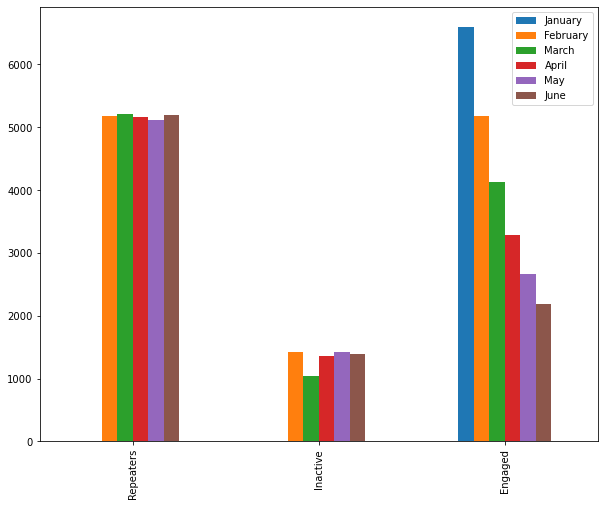

In [17]:
#bar graph of the three metrics for better visualization
df.plot.bar(figsize=(10,8))